### Use Titanic Data set and predict a classification - survival or deceased

In [2]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
#LOAD DATA
titanic_data= pd.read_csv('titanic_train.csv')

In [26]:
len(titanic_data)

891

In [28]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [33]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [36]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### DATA ANALYSIS

#### here we see that how many survived vs died using countplot method of seaborn

<Axes: xlabel='Survived', ylabel='count'>

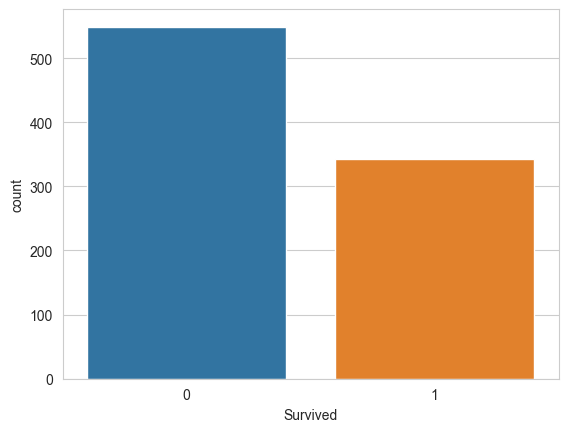

In [38]:
#countplot of survived vs not survived


sns.countplot(x='Survived', data= titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

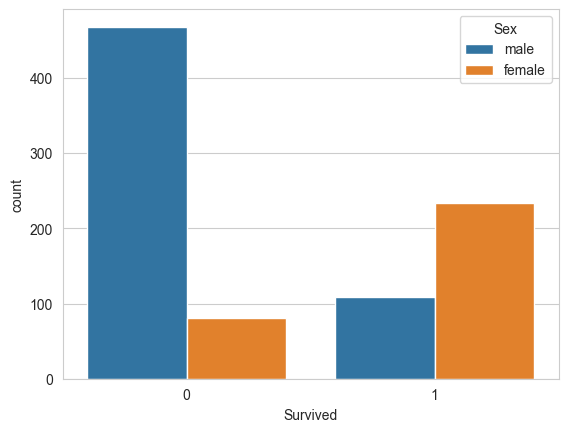

In [40]:
## male vs female survived

sns.countplot(x='Survived' ,data=titanic_data , hue='Sex')

In [42]:
# check missing data
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

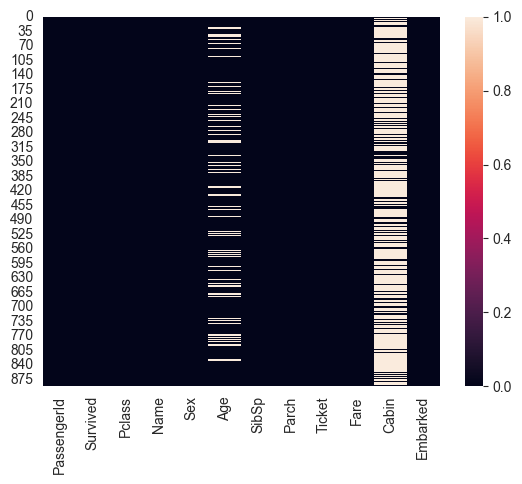

In [44]:
# to visualize null values
sns.heatmap(titanic_data.isna())

In [47]:
#find the % of null values in age column

(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [48]:
#find the % of the null values in cabin column

(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

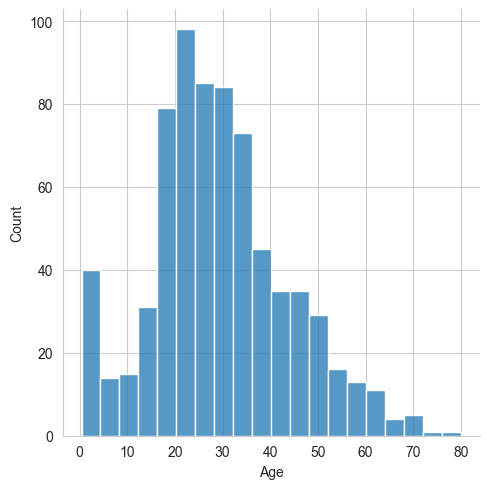

In [49]:
#find the distribution for the age column

sns.displot(x='Age', data=titanic_data)

### DATA CLEANING
we will fill the missing values for age. in order to fill missing values we use fillna method.
for now we will fill the missing age by taking average of all age

In [53]:
# fill age column



titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [54]:
#verify null value

titanic_data["Age"].isna().sum()


0

<Axes: >

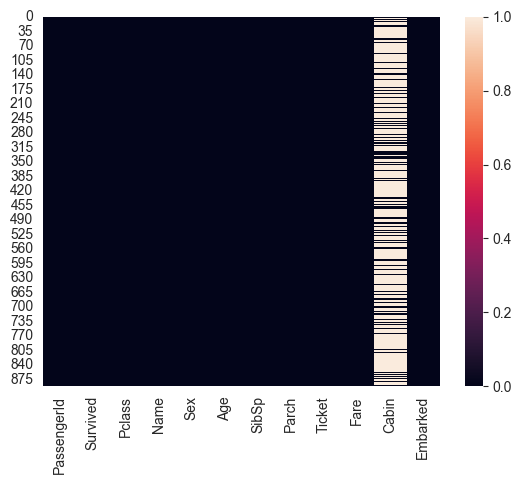

In [55]:
#visualize null values

sns.heatmap(titanic_data.isna())

In [56]:
titanic_data.drop('Cabin',axis=1, inplace=True)

In [57]:
# see content of data

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### preparing data for model


In [58]:
#check for non -numeric column

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [59]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [64]:
# convert sex column to numerical values


gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [65]:
titanic_data['Gender']=gender

In [66]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True


In [68]:
#drop the column which are not required

titanic_data.drop(['Name' , 'Sex' , 'Ticket' , 'Embarked'],axis=1,inplace=True)

In [69]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,False
2,3,1,3,26.0,0,0,7.9250,False
3,4,1,1,35.0,1,0,53.1000,False
4,5,0,3,35.0,0,0,8.0500,True


In [70]:
# seperate dependent and independent variables

x=titanic_data[['PassengerId','Survived','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [71]:
x

,PassengerId,Survived,Age,SibSp,Parch,Fare,Gender
0,1,0,22.000000,1,0,7.2500,True
1,2,1,38.000000,1,0,71.2833,False
2,3,1,26.000000,0,0,7.9250,False
3,4,1,35.000000,1,0,53.1000,False
4,5,0,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,True
887,888,1,19.000000,0,0,30.0000,False
888,889,0,29.699118,1,2,23.4500,False
889,890,1,26.000000,0,0,30.0000,True


In [72]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Data Modelling

Building Model using Logestic Regression


In [73]:
#import train test split method

from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [75]:
#import Logistic Regression

from sklearn.linear_model import LogisticRegression

In [78]:
lr=LogisticRegression()

In [79]:
lr.fit(x_train, y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
#predict

predict=lr.predict(x_test)

### TESTING



In [82]:
#print confusion matrix

from sklearn.metrics import confusion_matrix


In [87]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No' , 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,175,0
Actual Yes,0,120


In [88]:
from sklearn.metrics import classification_report


In [89]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       120

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295

